# Demo_Projects_CNN_digits_recognition_Benbhk

This project is a demonstration. It uses a convolutional neural network (CNN) to predict a number.

In this project, will use the The MNIST database (Modified National Institute of Standards and Technology database), is a large database of handwritten digits.

## Import

In [4]:
# importation of the datasets from tensorflow
from tensorflow.keras import datasets

# conventional imports
import matplotlib.pyplot as plt
import random
import pickle as pkl
import numpy as np

## Loading the MNIST database

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 1s 0us/step


## Display of some exemple

<Figure size 640x480 with 0 Axes>

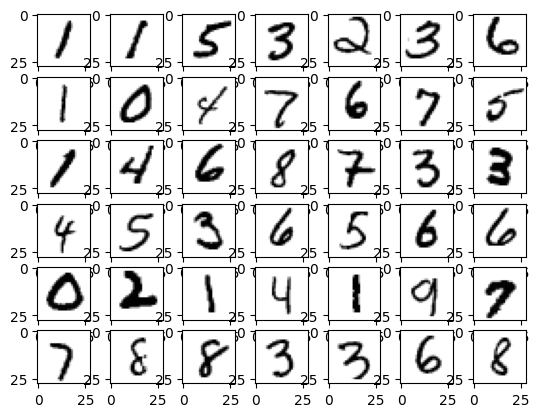

In [6]:
plt.figure()

rows = 6
columns = 7

f, axarr = plt.subplots(rows,columns) 

for i in range(rows):
    for j in range(columns):
        rand = random.randint(0, X_train.shape[0])
        axarr[i,j].imshow(X_train[rand],cmap='gray_r')

## Preprocessing

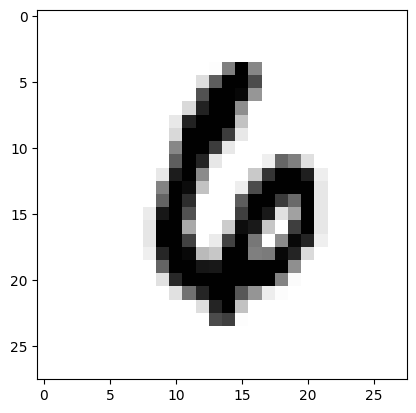

In [7]:
plt.imshow(X_train[39],cmap='gray_r')

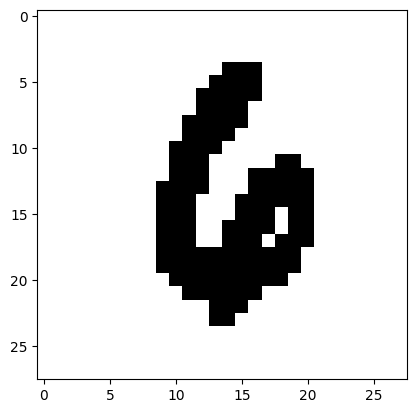

In [8]:

import numpy as np

def fun(e):
    if e > 50:
        return 255
    return 0

vfunc = np.vectorize(fun)

plt.imshow(vfunc(X_train[39]),cmap='gray_r')

In [9]:
for i in range(0,len(X_train)):
    X_train[i] = vfunc(X_train[i])
    print(f'{round(i*100/len(X_train),1)} %', end = '\r')
    
for i in range(0,len(X_test)):
    X_test[i] = vfunc(X_test[i])
    print(f'{round(i*100/len(X_test),1)} %', end = '\r')

<Figure size 640x480 with 0 Axes>

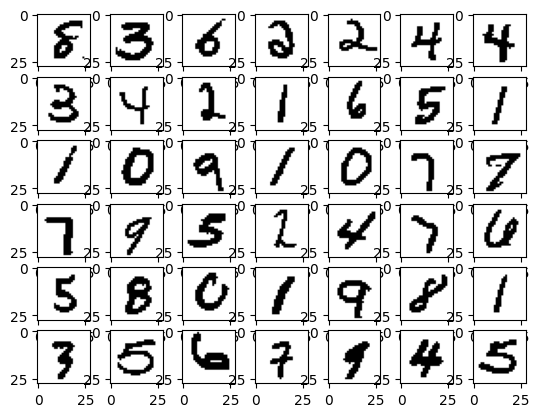

In [10]:
plt.figure()

rows = 6
columns = 7

f, axarr = plt.subplots(rows,columns) 

for i in range(rows):
    for j in range(columns):
        rand = random.randint(0, X_train.shape[0])
        axarr[i,j].imshow(X_train[rand],cmap='gray_r')

### Normalization (0_255 -> -0.5_0.5)

In [11]:
def img_normalizer(X):
    return X/255-0.5
    
X_train_normlz = img_normalizer(X_train)
X_test_normlz = img_normalizer(X_test)

#### Note : this normalisation keep the quality of the image.

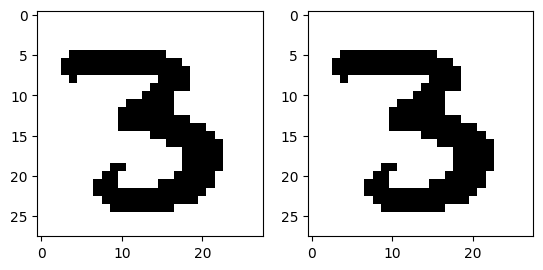

In [12]:
f, axarr = plt.subplots(1,2) 


axarr[0].imshow(X_train[12],cmap='gray_r')
axarr[1].imshow(X_train_normlz[12],cmap='gray_r')

### Inputs the RGB dimensionality in X_train and X_test

In [13]:
from tensorflow.keras.backend import expand_dims

X_train_normlz = expand_dims(X_train_normlz,axis=-1)
X_test_normlz = expand_dims(X_test_normlz,axis=-1)

In [14]:
X_test_normlz[1].shape

TensorShape([28, 28, 1])

### Categorize the y_train and y_test

In [15]:
y_test[7]

9

In [16]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [17]:
y_test_cat[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Model construction

### Building the CNN Architecture

In [18]:
from tensorflow.keras import layers, Sequential, models


def initialize_model():
    
    model = Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(8, (4,4), strides=(1,1), input_shape=(28, 28, 1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    ### Second convolution & max-pooling
    model.add(layers.Conv2D(16, (3,3), strides=(1,1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(10, activation='softmax')) 
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True)

model = initialize_model()

history = model.fit(X_train_normlz, y_train_cat,  
                    validation_split=0.3,
                    epochs=10, 
                    batch_size=4, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/10
10500/10500 [==============================] - 59s 6ms/step - loss: 0.3146 - accuracy: 0.9058 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 2/10
10500/10500 [==============================] - 72s 7ms/step - loss: 0.1043 - accuracy: 0.9683 - val_loss: 0.1049 - val_accuracy: 0.9683
Epoch 3/10
10500/10500 [==============================] - 72s 7ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.0771 - val_accuracy: 0.9768
Epoch 4/10
10500/10500 [==============================] - 64s 6ms/step - loss: 0.0632 - accuracy: 0.9812 - val_loss: 0.0808 - val_accuracy: 0.9757
Epoch 5/10
10500/10500 [==============================] - 62s 6ms/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 6/10
10500/10500 [==============================] - 63s 6ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0851 - val_accuracy: 0.9769
Epoch 7/10
10500/10500 [==============================] - 66s 6ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0

In [20]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,0.3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0.9,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

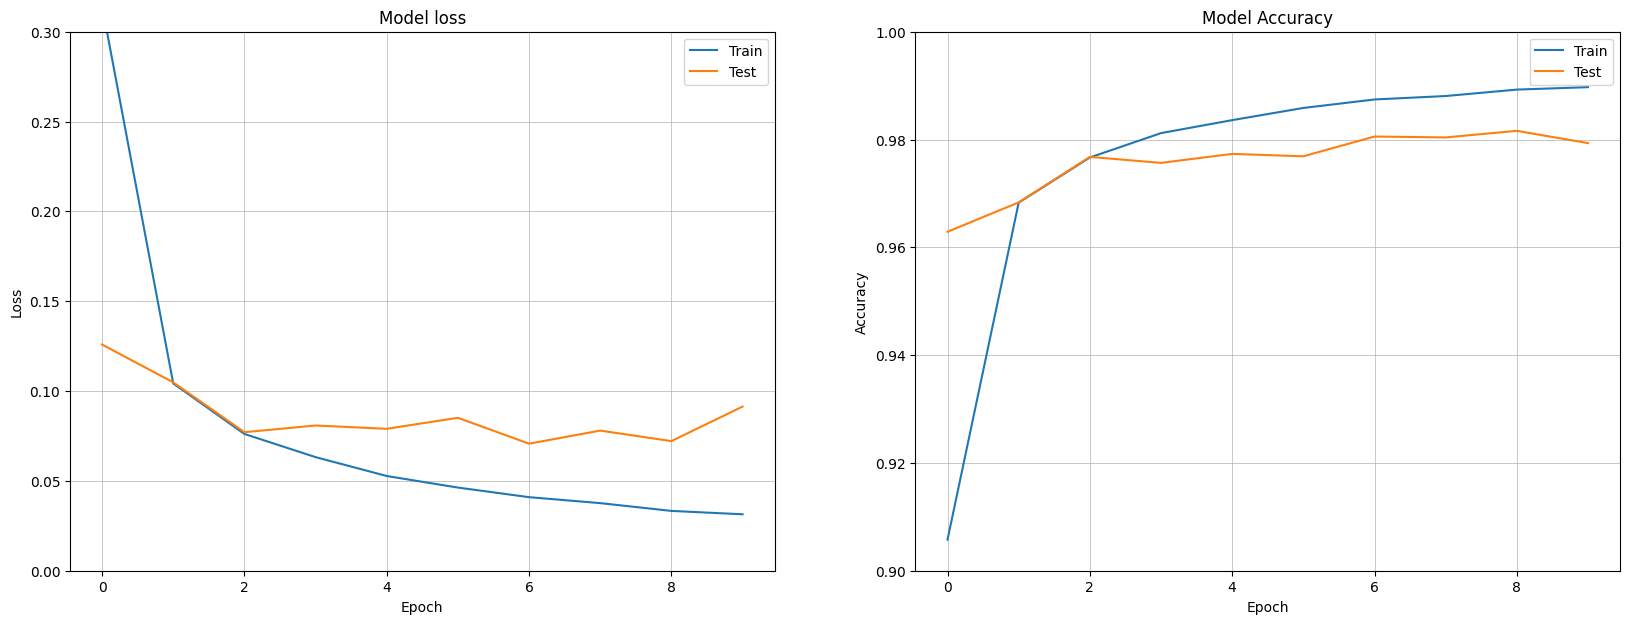

In [21]:
plot_loss_accuracy(history)

### Evalation

In [22]:
model.evaluate(X_test_normlz,y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0694 - accuracy: 0.9820


[0.06944505125284195, 0.9819999933242798]

98 % accurate on the test set

## Saving the model

In [27]:
pkl.dump(model, open('../Demo_Project_CNN_digits_recognition_Benbhk/Models/digits_recognition_model_V2', 'wb'))

In [26]:
import zipfile

model.save('my_model.h5')

# Create a new zip file and add the saved model file to it
with zipfile.ZipFile('../Demo_Project_CNN_digits_recognition_Benbhk/Models/my_model.zip', 'w', compression=zipfile.ZIP_DEFLATED) as myzip:
    myzip.write('my_model.h5')

# Close the zip file
myzip.close()